<a href="https://colab.research.google.com/github/mlconsultantssa/traffic/blob/8-dylan-data-exploration/charizardeda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory data analysis ⛏ 
**For Charizard**






<p>&nbsp;</p>

> *Note: please dont delete anyone elses code and try leave comments and neaten up your code before you go. Alternatively you can create you own colab notebook and just leave a link*


<p>&nbsp;</p>

---



This is an adhock get going exploratory data analysis notebook for our client Charizard. Exploratory data analysis's are all about understanding the data to avoid making detrimental assumtions later when developing models. Exploratory data analaysis's are notoriously directionless, its all about thinking about the right questions to ask about the data, metaphorically poking at it from different directions. I have given some examples of questions to get you going. 





<p>&nbsp;</p>

*  How much missing data is there, and where?

*   Where are all the cameras in SA? maybe colour code them by client
*   Can you find any anomalies?
*   What does a vehcle trajecotry look like?
*   Is there some common behvious between vehicles



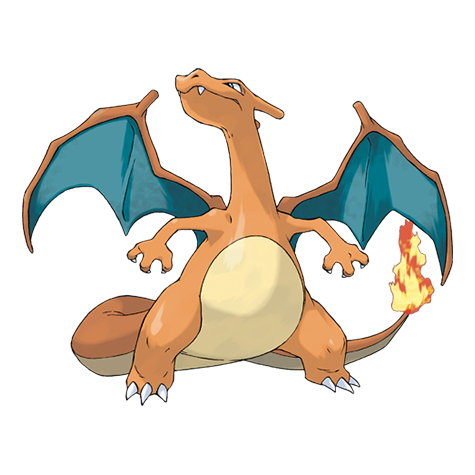

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


# you will have to create create a short cut to the data in your google drive 
# 1. Go to Shared with me in Google Drive.
# 2. Select the folder or file you want to acess.
# 3. Right click on it and choose Add shortcut to drive.

data_path = '/content/drive/MyDrive/mlc/camera_events.csv'

df = pd.read_csv(data_path)

In [ ]:
df.head()

,Unnamed: 0,id,uuid,foreign_ref,camera_id,number_plate,image_url,flagged_by_partner,created_at,modified_at,elapsed_time,source_id,latitude,longitude,ipv4_address,version,external_source_elapsed_time,external_error_code
0,0,1766850,2edfb3c5-1dea-4626-9ad1-fbd318,2209-1510XOF05755756,11,NPN22382,images/one-space/one-space/met_one_s001/15-09-...,True,2022-09-15 08:25:28.170153,2022-09-15 08:25:32.841758,542,1,NaN,NaN,45.221.131.88,2,150,0
1,1,1766852,9b7acb51-411d-4ba4-983a-255243,2209-1510BYY05877825,11,FNK478GP,images/one-space/one-space/met_one_s001/15-09-...,True,2022-09-15 08:25:35.537061,2022-09-15 08:25:39.616909,539,1,NaN,NaN,45.221.131.88,2,135,0
2,2,1766853,989749f6-be07-448a-8e49-69eb85,2209-1510PSY01181189,14,HH13CWGP,NaN,True,2022-09-15 08:25:49.333807,2022-09-15 08:25:49.333807,1,1,1.000000,1.00000,45.221.131.88,3,81,0
3,3,1766854,2da65a38-2a82-4231-9b46-fd9d5b,2209-1510PSY01181189,14,HH13CWGP,NaN,True,2022-09-15 08:25:49.593989,2022-09-15 08:25:49.593989,1,1,1.000000,1.00000,45.221.131.88,3,81,0
4,4,1766855,89fce277-8edc-46b4-86fb-f1bd88,2209-1510PUP00539041,14,WFM353GP,images/vumacam/vumacam/met_vum_001/15-09-2022/...,True,2022-09-15 08:25:55.534027,2022-09-15 08:25:57.273136,838,1,-26.057364,28.06326,45.221.131.88,3,221,0


How many camera_id's are there?

In [ ]:
print('unique camera ids', df['camera_id'].unique())
print('count', df['camera_id'].nunique())



unique camera ids [11 14 21  5 20  9 12  7 10 22 17 24 25  8 18]
count 15


How much data is there?

In [ ]:
len(df)

2301145

What are is the proportion of nans in columns [url, camera_is, location, licence plate] ?

0.4224570811487325
0.0
0.2540652588168064
0.0


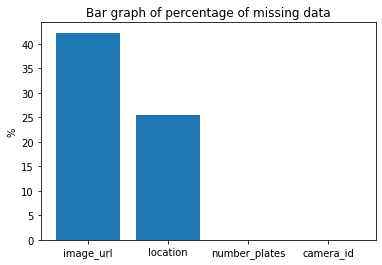

In [ ]:
urls = df['image_url']

perc_nans_IMAGE_URL = df['image_url'].isna().sum()/len(df)
perc_nans_CAMERA_ID = df['camera_id'].isna().sum()/len(df)
perc_nans_LOCATION = df['latitude'].isna().sum()/len(df) # using latitude only since both of longitude and latitude are the same data
perc_nans_NUMBER_PLATE = df['number_plate'].isna().sum()/len(df)
print(perc_nans_IMAGE_URL)
print(perc_nans_CAMERA_ID)
print(perc_nans_LOCATION)
print(perc_nans_NUMBER_PLATE)

x = ['image_url', 'location', 'number_plates', 'camera_id']
y = [perc_nans_IMAGE_URL*100, perc_nans_LOCATION*100, perc_nans_NUMBER_PLATE*100, perc_nans_CAMERA_ID*100]

plt.bar(x, y)
plt.title('Bar graph of percentage of missing data')
plt.ylabel('%')
plt.show()



Next we can try make a similar plot bit with each bar coloured in with the proportion onctribution for a particular camera id/client

[0.041910661568988046, 0.664562861587469, 0.1808529095388459, 0.28183986406256395, 1.0, 0.3891857234451806, 0.16756393001345896, 0.2427536231884058, 0.11842105263157894, 0.4782608695652174, 1.0, 0.9936930623686054, 0.9853574504737296, 0.06382978723404255, 0.95]
[0.671454152003927, 0.4103253034942165, 0.32985183385960654, 0.3873193301396225, 0.8408360128617364, 0.0, 0.6398048452220727, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.95]


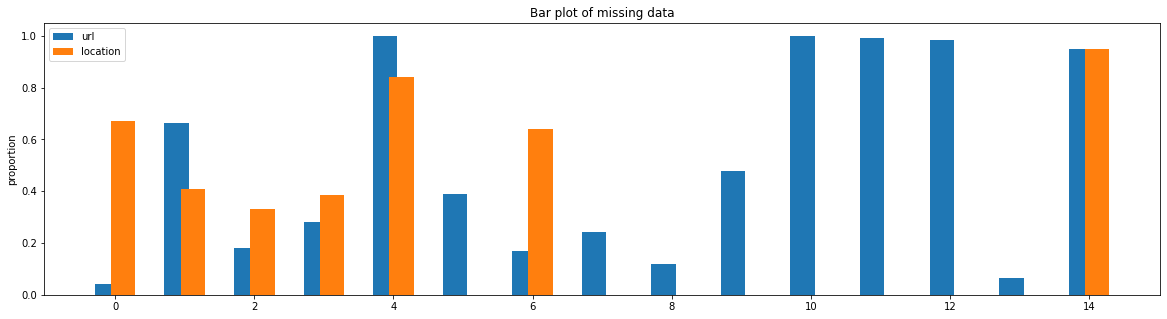

In [ ]:
camera_id_ = []
camera_url_info = []
camera_location_info = []
for camera_id in df['camera_id'].unique():
  df_client = df[df['camera_id'] == camera_id]
  camera_url_info.append(df_client['image_url'].isna().sum()/len(df_client))
  camera_location_info.append(df_client['latitude'].isna().sum()/len(df_client)+ (df_client['latitude']==1).sum()/len(df))
  camera_id_.append(str(camera_id))

print(camera_url_info)
print(camera_location_info)

labels = camera_id_

x = np.arange(len(labels)) # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = [20,5])
rects1 = ax.bar(x - width/3, camera_url_info, width, label='url')
rects2 = ax.bar(x + width/3, camera_location_info, width, label='location')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('proportion')
ax.set_title('Bar plot of missing data')

#ax.set_xticklabels(labels) 
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)



plt.show()

# fig, axs = plt.subplots(2)
# fig.suptitle('Vertically stacked subplots')
# axs[0].plot(x, y)
# axs[1].plot(x, -y)

In [ ]:
#https://faun.pub/how-to-launch-a-streamlit-app-directly-from-google-colab-8014165e0267
import streamlit as st
!pip install pyngrok 
!ngrok config add-authtoken 2G90z5mVCphY5pMQgmD26SAz8Fp_4b6xg6XrKKysYByYnhzQi


from pyngrok import ngrok 
public_url = ngrok.connect(port='8502')
public_url



NAME:
   ngrok - tunnel local ports to public URLs and inspect traffic

DESCRIPTION:
    ngrok exposes local networked services behinds NATs and firewalls to the
    public internet over a secure tunnel. Share local websites, build/test
    webhook consumers and self-host personal services.
    Detailed help for each command is available with 'ngrok help <command>'.
    Open http://localhost:4040 for ngrok's web interface to inspect traffic.

EXAMPLES:
    ngrok http 80                    # secure public URL for port 80 web server
    ngrok http -subdomain=baz 8080   # port 8080 available at baz.ngrok.io
    ngrok http foo.dev:80            # tunnel to host:port instead of localhost
    ngrok http https://localhost     # expose a local https server
    ngrok tcp 22                     # tunnel arbitrary TCP traffic to port 22
    ngrok tls -hostname=foo.com 443  # TLS traffic for foo.com to port 443
    ngrok start foo bar baz          # start tunnels from the configuration file

VERSI

INFO:pyngrok.ngrok:Opening tunnel named: http-80-f224ca6b-76dc-4920-ae53-0342da07472e
2022-10-14 22:29:35.864 Opening tunnel named: http-80-f224ca6b-76dc-4920-ae53-0342da07472e
INFO:pyngrok.process.ngrok:t=2022-10-14T22:29:35+0000 lvl=info msg=start pg=/api/tunnels id=048fac3de60317ec
2022-10-14 22:29:35.890 t=2022-10-14T22:29:35+0000 lvl=info msg=start pg=/api/tunnels id=048fac3de60317ec
2022-10-14 22:29:36.088 t=2022-10-14T22:29:36+0000 lvl=warn msg="failed to start tunnel" pg=/api/tunnels id=048fac3de60317ec err="Your account may not run more than 2 tunnels over a single ngrok agent session.\nThe tunnels already running on this session are:\ntn_2G90Dnipnr8SMFINogZQfRS9ElX, tn_2G90Dnz26sFioS3kqbIncq1mEkz\n\r\n\r\nERR_NGROK_324\r\n"
INFO:pyngrok.process.ngrok:t=2022-10-14T22:29:36+0000 lvl=info msg=end pg=/api/tunnels id=048fac3de60317ec status=502 dur=200.583344ms
2022-10-14 22:29:36.107 t=2022-10-14T22:29:36+0000 lvl=info msg=end pg=/api/tunnels id=048fac3de60317ec status=502 dur=20

PyngrokNgrokHTTPError: ignored

In [ ]:
!streamlit run /content/streamlit_app.py & npx localtunnel — port 8501 

## removing all rows with invalid location data

In [ ]:
df_ = df[['number_plate', 'latitude',	'longitude']].dropna()
df_ = df_[df_.latitude != 1]
df_ = df_[df_.longitude != 1]
df_


,number_plate,latitude,longitude
4,WFM353GP,-26.057364,28.063260
7,DS57GYGP,-26.176180,28.121520
11,NUR8654,-26.115946,28.084572
18,FD88DRGP,-26.017914,27.992080
22,RSB886GP,-26.121899,28.091606
...,...,...,...
2300962,ND179019,28.079058,-26.087505
2300964,JT19XGGP,28.214653,-26.058414
2300996,ND151022,-28.025641,32.279060
2301053,JH75PBGP,28.175766,-26.239086


In [ ]:
f = df_[df_['number_plate']=='000001']
len(f)


13

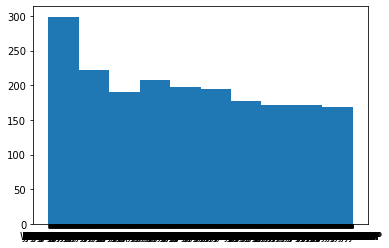

In [ ]:
plt.hist(df_['number_plate'][:2000])
plt.show()

In [ ]:
df_.groupby('number_plate').size().sort_values(ascending=False)


number_plate
BK03PSGP    8132
Y17         2994
NUR         2521
0800        1541
JD79WMGP    1405
            ... 
CZ23SBGP       1
CZ2316         1
ND486437       1
CZ20SGGP       1
DCY858GP       1
Length: 129761, dtype: int64

In [ ]:
np.sign(-3)

-1

        number_plate   latitude  longitude
2103             Y17 -26.178333  28.011698
9624             Y17 -26.158287  28.034222
87324            Y17 -26.047565  28.031073
103479           Y17 -26.139560  27.997631
106824           Y17 -26.138468  28.045202
...              ...        ...        ...
2190011          Y17 -26.138468  28.045202
2190914          Y17 -26.135963  28.039250
2191433          Y17 -26.140326  28.039412
2191934          Y17 -26.138763  28.042540
2192857          Y17 -26.138763  28.042540

[2994 rows x 3 columns]
2152
        number_plate   latitude  longitude
2103             Y17 -26.178333  28.011698
9624             Y17 -26.158287  28.034222
87324            Y17 -26.047565  28.031073
103479           Y17 -26.139560  27.997631
106824           Y17 -26.138468  28.045202
...              ...        ...        ...
2190011          Y17 -26.138468  28.045202
2190914          Y17 -26.135963  28.039250
2191433          Y17 -26.140326  28.039412
2191934          Y17 -26

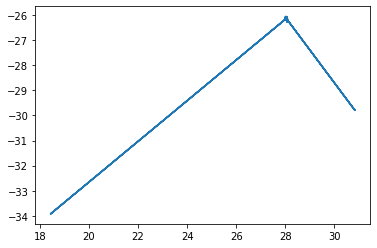

In [ ]:
person = df_[df_['number_plate'] == 'Y17']
print(person)
person = person[np.sign(person['latitude']) == -1]
person = person[np.sign(person['longitude']) == 1]
print(len(person))
import numpy as np
print(person)
latitudes = np.array(person['latitude'])
longitudes = np.array(person['longitude'])

plt.plot(longitudes, latitudes)
plt.show()



In [ ]:
person_ = np.array(person)
for i in person_:
  print('{},{},red,square'.format(i[1],i[2]))
  #print(i[1],',',i[2], ',','red',',','square')

-26.178333,28.011698,red,square
-26.158287,28.034222,red,square
-26.047565,28.031073,red,square
-26.13956,27.997631,red,square
-26.138468,28.045202,red,square
-26.136478,28.043882,red,square
-26.137218,28.038462,red,square
-26.137218,28.038462,red,square
-26.138763,28.04254,red,square
-26.13337,28.035997,red,square
-26.138763,28.04254,red,square
-26.139883,28.041956,red,square
-26.134817,28.03985,red,square
-26.137218,28.038462,red,square
-26.134817,28.03985,red,square
-26.138763,28.04254,red,square
-26.138763,28.04254,red,square
-26.138468,28.045202,red,square
-26.135927,28.035294,red,square
-26.13337,28.035997,red,square
-26.136478,28.043882,red,square
-26.138763,28.04254,red,square
-26.139408,28.037386,red,square
-26.137218,28.038462,red,square
-26.136478,28.043882,red,square
-26.137218,28.038462,red,square
-26.138763,28.04254,red,square
-26.137218,28.038462,red,square
-26.134636,28.035658,red,square
-26.138468,28.045202,red,square
-26.137218,28.038462,red,square
-26.139479,28.04430

https://mobisoftinfotech.com/tools/plot-multiple-points-on-map/

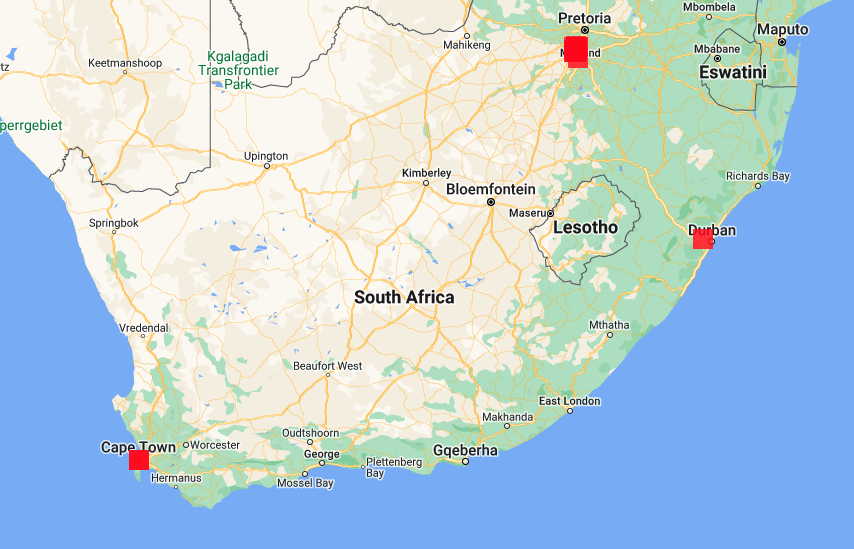

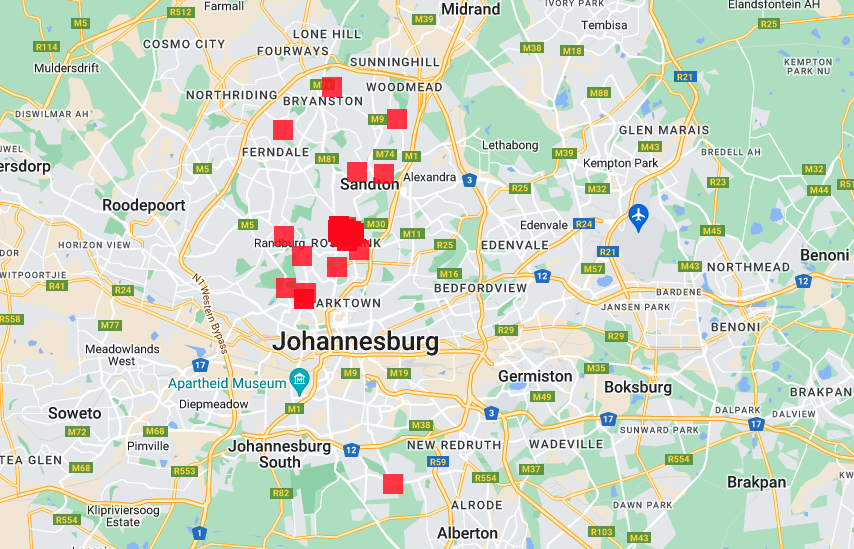



In [ ]:
BBox = (person.longitude.min(),   person.longitude.max(),      
         person.latitude.min(), person.latitude.max())
BBox

(18.434608091209, 30.837361838068, -33.922609364556, -26.047565)

# Analysing a single vehicle in space 


In [ ]:
person = df[df['number_plate'] == 'NPN22382']
person = person.dropna(subset=['latitude'])


print(person.head())
print(len(person))

        Unnamed: 0       id                            uuid  \
241920      241920  2021667  b018e615-4ef2-45c0-9b6f-a83603   
241923      241923  2021673  2c023888-f6e5-47c6-b4e6-d37238   
242396      242396  2022180  37ecfe01-f3b3-493e-8d63-3797c8   
246373      246373  2026198  716b69e1-01d9-4180-a588-23571d   
248888      248888  2028942  6c071edb-32fe-4b4c-bea6-cf57a1   

                 foreign_ref  camera_id number_plate  \
241920  2209-2708ZWX04938767         11     NPN22382   
241923  2209-2708BXK02517941         11     NPN22382   
242396  2209-2709FLN04906063         11     NPN22382   
246373  2209-2708BXK02517941         11     NPN22382   
248888  2209-2708BXK02517941         11     NPN22382   

                                                image_url  flagged_by_partner  \
241920  images/one-space/one-space/met_one_s001/27-09-...                True   
241923  images/one-space/one-space/met_one_s001/27-09-...                True   
242396  images/one-space/one-space/met_on

In [ ]:

df2 = pd.unique(person[['latitude', 'longitude']].values.ravel())
df2


array([-29.7950376 ,  30.83736184, -26.205     ,  28.0497    ,
       -33.92260936,  18.43460809])

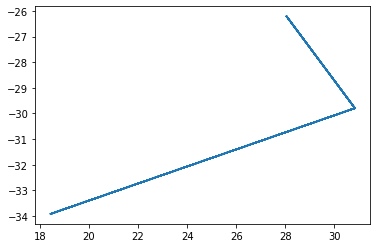

In [ ]:
import numpy as np
latitudes = np.array(person['latitude'])
longitudes = np.array(person['longitude'])
plt.plot(longitudes, latitudes)
plt.show()

Where is this on the map?

You can use https://dwtkns.com/pointplotter/ to plot coordinates

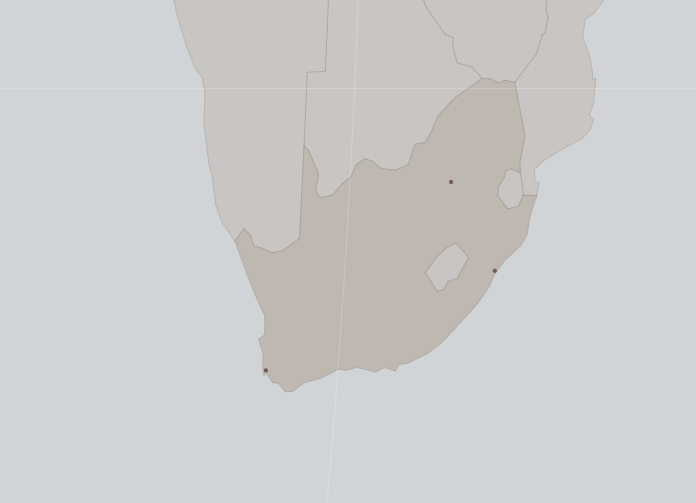

Oh sheei thats cool 👊

Lets pass the ball to a different person ⛹

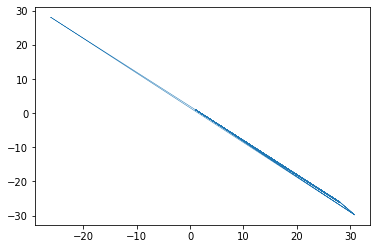

In [ ]:
person = df[df['number_plate'] == 'WFM353GP']
person = person.dropna(subset=['latitude'])


import numpy as np
latitudes = np.array(person['latitude'])
longitudes = np.array(person['longitude'])
plt.plot(longitudes, latitudes, linewidth = 0.5)
plt.show()

In [ ]:
person = person.loc[:,['longitude', 'latitude']]


In [ ]:
person = person[person['longitude'] != 1]
person

,longitude,latitude
4,28.063260,-26.057364
89243,28.027407,-26.075970
291787,28.063260,-26.057364
319514,28.085243,-26.104530
320998,28.063260,-26.057364
390352,30.837362,-29.795038
439603,28.069141,-26.083860
473350,28.039250,-26.135963
616730,28.057055,-26.060522
629977,28.045946,-26.147127


In [ ]:
person = np.array(person)
person

array([[ 28.06326   , -26.057364  ],
       [ 28.027407  , -26.07597   ],
       [ 28.06326   , -26.057364  ],
       [ 28.085243  , -26.10453   ],
       [ 28.06326   , -26.057364  ],
       [ 30.83736184, -29.7950376 ],
       [ 28.069141  , -26.08386   ],
       [ 28.03925   , -26.135963  ],
       [ 28.057055  , -26.060522  ],
       [ 28.045946  , -26.147127  ],
       [ 28.079058  , -26.087505  ],
       [ 28.031212  , -26.194054  ],
       [ 28.036228  , -26.069946  ],
       [ 27.943138  , -26.164711  ],
       [ 28.058832  , -26.05463   ],
       [ 28.069141  , -26.08386   ],
       [ 28.069532  , -26.045307  ],
       [ 28.057055  , -26.060522  ],
       [ 28.12152   , -26.17618   ],
       [ 28.037207  , -26.039146  ],
       [ 28.080252  , -26.041986  ],
       [ 28.12519   , -26.175596  ],
       [ 28.06326   , -26.057364  ],
       [ 28.085243  , -26.10453   ],
       [ 28.06326   , -26.057364  ],
       [ 30.83736184, -29.7950376 ],
       [ 28.069141  , -26.08386   ],
 

In [ ]:
for i in person:
  print(i[0],',',i[1])

28.06326 , -26.057364
28.027407 , -26.07597
28.06326 , -26.057364
28.085243 , -26.10453
28.06326 , -26.057364
30.837361838068 , -29.795037600073
28.069141 , -26.08386
28.03925 , -26.135963
28.057055 , -26.060522
28.045946 , -26.147127
28.079058 , -26.087505
28.031212 , -26.194054
28.036228 , -26.069946
27.943138 , -26.164711
28.058832 , -26.05463
28.069141 , -26.08386
28.069532 , -26.045307
28.057055 , -26.060522
28.12152 , -26.17618
28.037207 , -26.039146
28.080252 , -26.041986
28.12519 , -26.175596
28.06326 , -26.057364
28.085243 , -26.10453
28.06326 , -26.057364
30.837361838068 , -29.795037600073
28.069141 , -26.08386
28.03925 , -26.135963
28.037207 , -26.039146
28.049599 , -26.04284
28.064234 , -26.04844
-26.104021 , 28.05749
-26.149324 , 28.041117
-26.105167 , 28.070257
-26.153595 , 28.03756
-26.150743 , 28.044968
-26.08386 , 28.069141
30.837361838068 , -29.795037600073
28.069141 , -26.08386
28.03925 , -26.135963
28.037207 , -26.039146
28.049599 , -26.04284
28.064234 , -26.04844


In [ ]:
df2 = pd.unique(person[['latitude', 'longitude']].values.ravel())
df2


array([-26.057364  ,  28.06326   ,   1.        , -26.07597   ,
        28.027407  , -26.10453   ,  28.085243  , -29.7950376 ,
        30.83736184, -26.08386   ,  28.069141  , -26.135963  ,
        28.03925   , -26.060522  ,  28.057055  , -26.147127  ,
        28.045946  , -26.087505  ,  28.079058  , -26.194054  ,
        28.031212  , -26.069946  ,  28.036228  , -26.164711  ,
        27.943138  , -26.05463   ,  28.058832  , -26.045307  ,
        28.069532  , -26.17618   ,  28.12152   , -26.039146  ,
        28.037207  , -26.041986  ,  28.080252  , -26.175596  ,
        28.12519   , -26.04284   ,  28.049599  , -26.04844   ,
        28.064234  ,  28.05749   , -26.104021  ,  28.041117  ,
       -26.149324  ,  28.070257  , -26.105167  ,  28.03756   ,
       -26.153595  ,  28.044968  , -26.150743  ])

In [ ]:
df3 = pd.unique(person[['longitude', 'latitude']].values.ravel())
df3

array([ 28.06326   , -26.057364  ,   1.        ,  28.027407  ,
       -26.07597   ,  28.085243  , -26.10453   ,  30.83736184,
       -29.7950376 ,  28.069141  , -26.08386   ,  28.03925   ,
       -26.135963  ,  28.057055  , -26.060522  ,  28.045946  ,
       -26.147127  ,  28.079058  , -26.087505  ,  28.031212  ,
       -26.194054  ,  28.036228  , -26.069946  ,  27.943138  ,
       -26.164711  ,  28.058832  , -26.05463   ,  28.069532  ,
       -26.045307  ,  28.12152   , -26.17618   ,  28.037207  ,
       -26.039146  ,  28.080252  , -26.041986  ,  28.12519   ,
       -26.175596  ,  28.049599  , -26.04284   ,  28.064234  ,
       -26.04844   , -26.104021  ,  28.05749   , -26.149324  ,
        28.041117  , -26.105167  ,  28.070257  , -26.153595  ,
        28.03756   , -26.150743  ,  28.044968  ])

Lets see them on the map

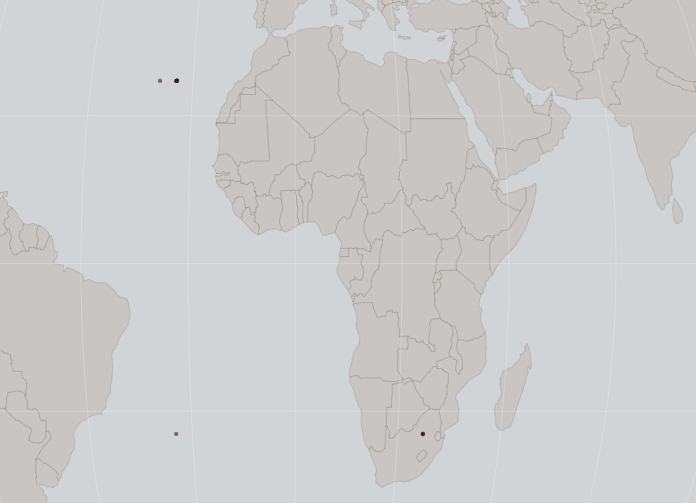

they all over the place, but i noticed some of the coordinates seemed to be swapped arroung, this might just be my code but worth looking into. 


Lets see what the coordinates look like on the map after i fixed some of the coordinates 

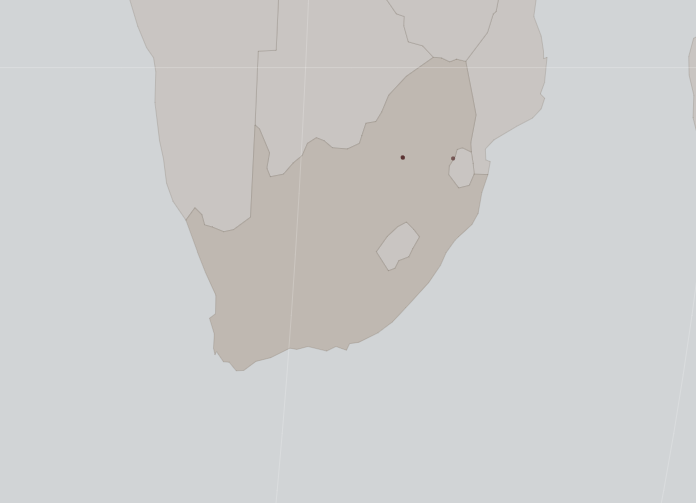

# This section has been added by MattVDB on 13/10/2022


Shape of the data: (rows, columns)

In [ ]:
# (number of rows, no of clms)
print(df.shape)

(2301145, 18)


Redo of Dyls: "What are is the proportion of nans in columns [url, camera_is, location, licence plate] ?" but including locations that are long/lat = 1 (not a true loction)

0.4224570811487325
0.0
0.6643836003380925
0.0


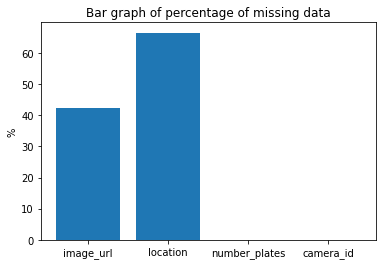

In [ ]:
urls = df['image_url']

perc_nans_IMAGE_URL = df['image_url'].isna().sum()/len(df)
perc_nans_CAMERA_ID = df['camera_id'].isna().sum()/len(df)
perc_nans_LOCATION = (df['latitude'].isna().sum() + (df['latitude']==1).sum())/len(df) # using latitude only since both of longitude and latitude are the same data
perc_nans_NUMBER_PLATE = df['number_plate'].isna().sum()/len(df)
print(perc_nans_IMAGE_URL)
print(perc_nans_CAMERA_ID)
print(perc_nans_LOCATION)
print(perc_nans_NUMBER_PLATE)

x = ['image_url', 'location', 'number_plates', 'camera_id']
y = [perc_nans_IMAGE_URL*100, perc_nans_LOCATION*100, perc_nans_NUMBER_PLATE*100, perc_nans_CAMERA_ID*100]

plt.bar(x, y)
plt.title('Bar graph of percentage of missing data')
plt.ylabel('%')
plt.show()


Display the datatype of each column

In [ ]:
print(df.dtypes)

Unnamed: 0                        int64
id                                int64
uuid                             object
foreign_ref                      object
camera_id                         int64
number_plate                     object
image_url                        object
flagged_by_partner                 bool
created_at                       object
modified_at                      object
elapsed_time                      int64
source_id                         int64
latitude                        float64
longitude                       float64
ipv4_address                     object
version                           int64
external_source_elapsed_time      int64
external_error_code               int64
dtype: object


Some Descriptive Statistics, these will likely not be perticularly useful

In [ ]:
pd.set_option('display.width', 100)
pd.set_option('precision', 2)
stats = df.describe()
#'{:f}'.format(stats)
print (stats)

       Unnamed: 0        id  camera_id  elapsed_time  source_id  latitude  longitude   version  \
count    2.30e+06  2.30e+06   2.30e+06      2.30e+06   2.30e+06  1.72e+06   1.72e+06  2.30e+06   
mean     2.37e+05  1.37e+06   1.25e+01      3.77e+02   1.18e+00 -9.27e+00   9.85e+00  2.57e+00   
std      1.42e+05  7.72e+05   3.04e+00      2.93e+03   6.65e-01  1.70e+01   1.55e+01  4.95e-01   
min      0.00e+00  1.00e+00   5.00e+00      0.00e+00   1.00e+00 -9.00e+01  -3.40e+01  2.00e+00   
25%      1.15e+05  5.93e+05   1.10e+01      1.00e+00   1.00e+00 -2.62e+01   1.00e+00  2.00e+00   
50%      2.30e+05  1.43e+06   1.40e+01      1.55e+02   1.00e+00  1.00e+00   1.00e+00  3.00e+00   
75%      3.56e+05  2.10e+06   1.40e+01      4.92e+02   1.00e+00  1.00e+00   2.80e+01  3.00e+00   
max      5.00e+05  2.30e+06   2.50e+01      2.79e+05   4.00e+00  3.10e+01   3.23e+01  3.00e+00   

       external_source_elapsed_time  external_error_code  
count                      2.30e+06             2.30e+06  

In [ ]:
class_count_camera_id = df.groupby('camera_id').size()
print (class_count_camera_id)

camera_id
5      195384
7        1380
8          94
9       14037
10        228
11     723205
12       5944
14    1292737
17         87
18         20
20        622
21      57638
22         46
24       8562
25       1161
dtype: int64


In [ ]:
class_count_longitude = df.groupby('longitude').size()
print (class_count_longitude)

longitude
-34.01     440
-33.76      38
-29.85    1352
-29.85    1242
-29.85     717
          ... 
 30.99    3465
 31.00    2052
 31.02    5032
 31.02    3554
 32.28    2134
Length: 2949, dtype: int64


In [ ]:
class_count_latitude = df.groupby('latitude').size()
print (class_count_latitude)

latitude
-90.00      14
-34.27       8
-34.12       9
-34.12      47
-33.98     182
          ... 
 29.45       2
 30.99     717
 31.00     936
 31.02    1352
 31.02    1242
Length: 2945, dtype: int64


In [ ]:
class_count_number_plate = df.groupby('number_plate').size()
print (class_count_number_plate)

number_plate
000001      32
00001       67
000ABFGP     3
000BKLGP     5
000EPKGP     4
            ..
zts598gp     2
ztx468gp     2
zvh376gp     1
zvt662gp     2
zvz368gp     2
Length: 209959, dtype: int64
